In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path
import requests
from io import BytesIO
from zipfile import ZipFile, BadZipFile

import numpy as np
import pandas as pd
import pandas_datareader.data as web
from sklearn.datasets import fetch_openml

pd.set_option('display.expand_frame_repr', False)

In [21]:
DATA_STORE = Path('assets.h5')

In [16]:
df = pd.read_csv('../data/household.csv', parse_dates=[['Date', "Time"]], infer_datetime_format=True).set_index("Date_Time")

In [39]:
df = df[df["Global_active_power"] != "?"].astype("float32")

In [40]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0


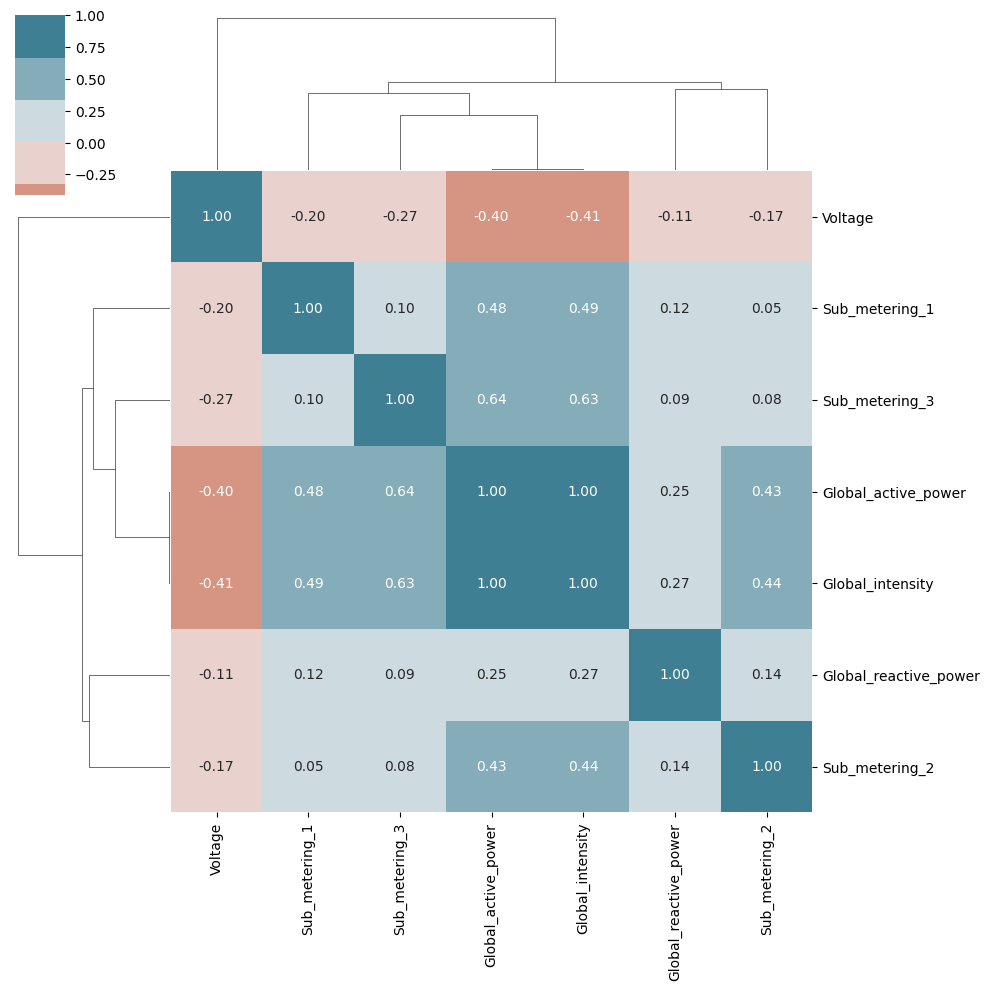

In [41]:
import seaborn as sns

sns.clustermap(df.corr(),
               annot=True,
               fmt='.2f',
               cmap=sns.diverging_palette(h_neg=20,
                                          h_pos=220), center=0);

In [42]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('custom/electricity', df)

### M4 DATASET

In [8]:
m4_data = pd.read_csv('../datasets/M4-methods/Dataset/Train/Monthly-train.csv')
m4_data.drop('V1', axis = 1, inplace = True)

In [20]:
m4_data[m4_data.columns[~m4_data.isnull().any()]]

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43
0,8000.0,8350.0,8570.0,7700.0,7080.0,6520.0,6070.0,6650.0,6830.0,5710.0,...,5780.0,5700.0,4680.0,4970.0,6850.0,6740.0,7490.0,6250.0,6900.0,5870.0
1,2440.0,2490.0,2710.0,2290.0,1960.0,1990.0,1960.0,2530.0,2640.0,2650.0,...,1770.0,1960.0,1860.0,1340.0,2150.0,2180.0,2030.0,1730.0,1860.0,1880.0
2,2670.0,2590.0,2784.0,2816.0,2888.0,2906.0,2839.0,2860.0,2798.0,2795.0,...,2861.0,2991.0,3063.0,3134.0,3020.0,2947.0,3026.0,3060.0,3008.0,2972.0
3,7264.0,7215.0,7022.0,7040.0,6966.0,6984.0,7025.0,7082.0,6956.0,7014.0,...,6866.0,6814.0,6806.0,6806.0,6855.0,6951.0,6898.0,6898.0,6922.0,6768.0
4,4210.0,4290.0,4250.0,4320.0,4320.0,4330.0,4320.0,4260.0,4220.0,4260.0,...,4470.0,4310.0,4280.0,4220.0,4190.0,4120.0,4150.0,4190.0,4180.0,4320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,9964.0,7212.0,7858.0,8493.0,8203.0,8362.0,7238.0,7357.0,8642.0,8833.0,...,7228.0,8280.0,9580.0,10622.0,9985.0,6370.0,7657.0,7889.0,7587.0,7375.0
47996,1696.6,1627.2,1465.4,1672.8,1760.1,1974.8,1733.7,1898.0,1952.4,1684.6,...,1587.4,1403.7,1440.5,1450.3,1611.7,1206.6,1086.0,1245.4,1330.3,1352.6
47997,5900.0,6000.0,6280.0,6100.0,5410.0,5320.0,5130.0,5330.0,5810.0,5840.0,...,5960.0,5620.0,5940.0,5870.0,5690.0,5460.0,6400.0,6460.0,5370.0,5350.0
47998,4660.0,4980.0,5060.0,5090.0,4790.0,4840.0,4640.0,4770.0,4940.0,4840.0,...,5130.0,5120.0,5130.0,4940.0,4860.0,5090.0,5460.0,5340.0,4930.0,4710.0


In [10]:
m4_data.head(3)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V2786,V2787,V2788,V2789,V2790,V2791,V2792,V2793,V2794,V2795
0,8000.0,8350.0,8570.0,7700.0,7080.0,6520.0,6070.0,6650.0,6830.0,5710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2440.0,2490.0,2710.0,2290.0,1960.0,1990.0,1960.0,2530.0,2640.0,2650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2670.0,2590.0,2784.0,2816.0,2888.0,2906.0,2839.0,2860.0,2798.0,2795.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
m4_filtered = m4_data[m4_data.columns[~m4_data.isnull().any()]]

In [23]:
with pd.HDFStore(DATA_STORE) as store:
    store.put('custom/m4_monthly', m4_filtered)

### NAB Dataset